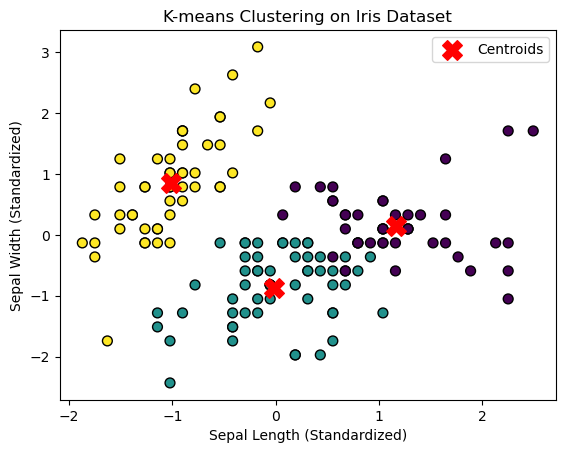

In [33]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
species_names = iris.target_names

# Define a custom KMeans class
class KMeans:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        # Initialize centroids by randomly selecting data points
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.max_iter):
            # Calculate distances from each data point to centroids
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            # Assign data points to the nearest centroid
            labels = np.argmin(distances, axis=0)
            # Calculate new centroids based on assigned data points
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            # Check if centroids' movement is within tolerance
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids
        self.labels_ = labels

    def predict(self, X):
        # Calculate distances from each data point to centroids
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        # Assign data points to the nearest centroid
        labels = np.argmin(distances, axis=0)
        return labels

# Standardize the features for effective clustering
X_standardized = StandardScaler().fit_transform(X)

# Instantiate and fit KMeans model
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_standardized)
labels = kmeans.predict(X_standardized)

# Plot the clustered data
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.title('K-means Clustering on Iris Dataset')
plt.legend()
plt.show()
